In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
data = pd.read_csv ('../data/measurements.csv')

In [6]:
data.shape

(388, 12)

In [7]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [12]:
data.isnull().sum()/ len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
refill liters    96.649485
refill gas       96.649485
dtype: float64

In [13]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [14]:
data['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [15]:
data['AC'].unique()

array([0, 1], dtype=int64)

In [16]:
data['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [17]:
# i am going to delete the columns that have more than a 60% of total nulls because they tent to be irrelevant

In [18]:
umbral = 0.6 * len(data)

# Elimina las columnas con más del 60% de valores nulos
data = data.dropna(axis=1, thresh=umbral)

In [20]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [21]:
df_con_nulos = data[data.isnull().any(axis=1)]

In [25]:
data['temp_inside'].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [24]:
df_con_nulos.head(13)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
93,"12,4","4,7",43,NaN,10,SP98,0,0,0
95,"11,8","5,3",52,NaN,11,SP98,0,0,0
97,"15,7","5,3",33,NaN,9,SP98,0,0,0
98,"12,9","5,7",35,NaN,9,SP98,0,0,0
99,"6,4","4,4",37,NaN,10,SP98,0,0,0
100,"5,3","4,1",34,NaN,9,SP98,0,0,0
102,"18,8",5,62,NaN,9,SP98,0,1,0
201,"22,2","3,8",42,NaN,15,SP98,0,0,0
203,"12,6","4,1",33,NaN,17,SP98,0,0,0
261,"24,5","3,9",50,NaN,15,E10,0,0,1


In [26]:
data = data.dropna()

In [27]:
data.isnull().sum()/ len(data)*100

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
AC              0.0
rain            0.0
sun             0.0
dtype: float64

In [29]:
data['distance'] = data['distance'].str.replace(',', '.').astype(float)

In [30]:
data['consume'] = data['consume'].str.replace(',', '.').astype(float)

In [32]:
data['temp_inside'] = data['temp_inside'].str.replace(',', '.').astype(float)

In [35]:
columnas_sin_gas_type = data.drop('gas_type', axis=1)
columnas_sin_gas_type.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

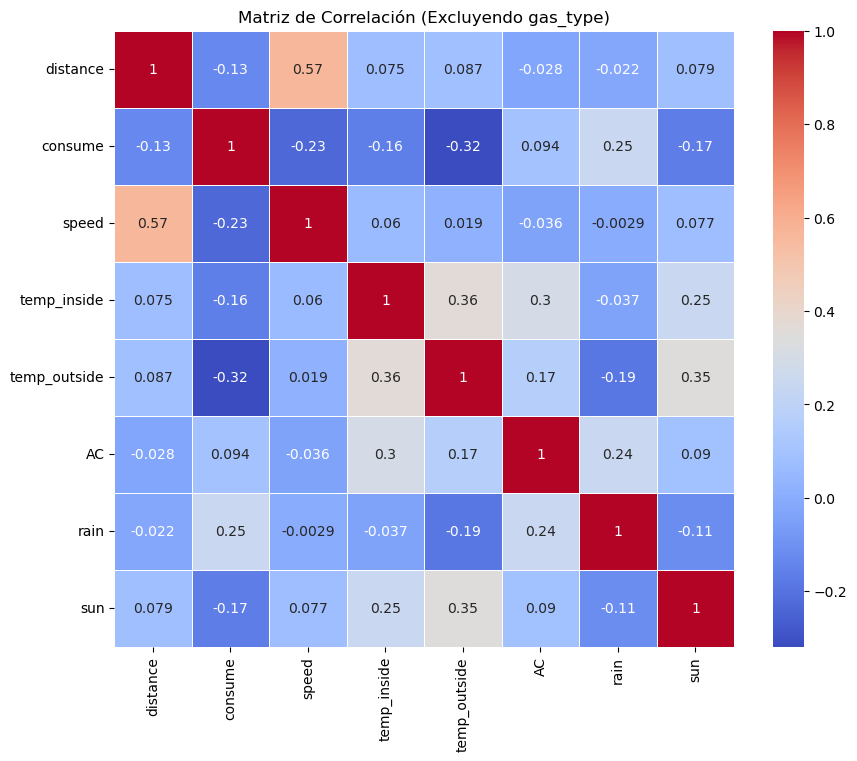

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(columnas_sin_gas_type.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Excluyendo gas_type)')
plt.show()